# EDA & Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = "/content/sample_data/Walmart(original).csv"
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
df.head()

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [ ]:
# Summary statistics
summary_statistics = df.describe()
summary_statistics

CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.000000  
max          17.000000     9.000000

In [ ]:
# Filling missing professions with "Unknown"
df.fillna({'Profession': 'Unknown'}, inplace=True)

# Removing rows where Age is 0
df = df[df['Age'] > 0]

## Graphs

Text(0.5, 1.0, 'Family Size Distribution')

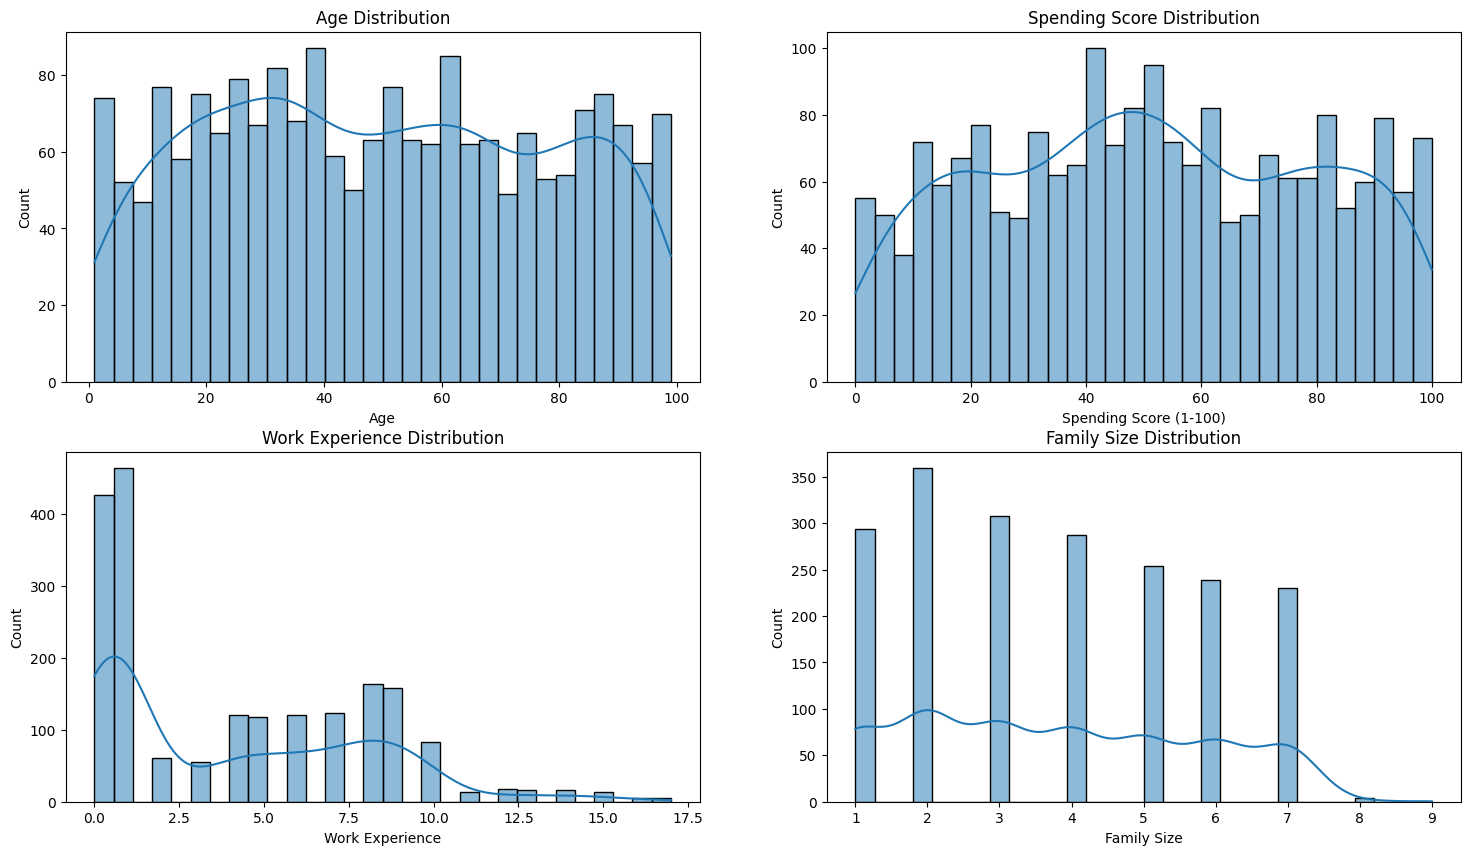

In [ ]:
# Plotting distributions of numeric variables
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Spending Score Distribution')

sns.histplot(df['Work Experience'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Work Experience Distribution')

sns.histplot(df['Family Size'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Family Size Distribution')

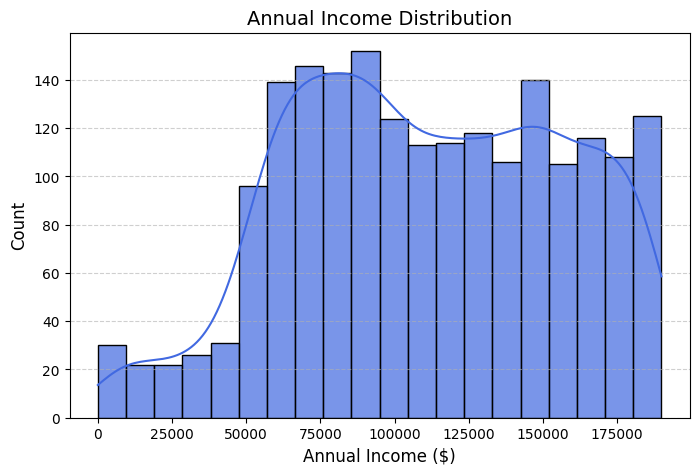

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual Income ($)'], bins=20, kde=True, color="royalblue", edgecolor="black", alpha=0.7)
plt.title('Annual Income Distribution', fontsize=14)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Encoding categorical variables before correlation analysis
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes
df_encoded['Profession'] = df_encoded['Profession'].astype('category').cat.codes

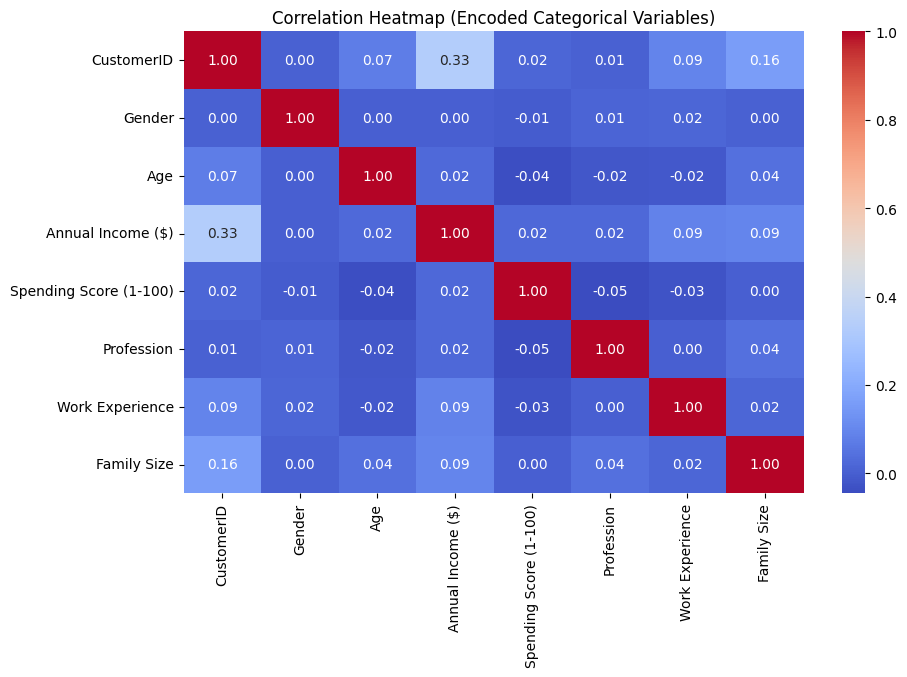

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Encoded Categorical Variables)")
plt.show()

Key Insights from Data Visualization:

# **Age Distribution:**

The majority of customers are between 20 and 80 years old.
The previously identified age = 0 error has been removed.

# **Annual Income Distribution:**

Income is spread widely, but there are more individuals earning below $150,000.
A few outliers in the higher income range.

# **Spending Score Distribution:**

Spending Scores are fairly evenly distributed across the range of 0 to 100.
Indicates different customer spending behaviors.

# **Work Experience Distribution:**

Most people have 0-10 years of work experience.
Few individuals have 15+ years.

# **Family Size Distribution:**

Most customers have a family size between 2 and 6.

# **Correlation Analysis:**

Annual Income and Spending Score have weak correlation.
Family Size and Work Experience show no significant correlation with other numerical features.
Age and Work Experience have a positive correlation, as expected.

# Clustering

In [ ]:
# file_path = "/content/sample_data/Walmart.csv"
# df1 = pd.read_csv(file_path)
df1 = df_encoded.copy()

In [ ]:
missing_values = df1.isnull().sum()
print("Missing values in each column:\n", missing_values)

total_missing = df1.isnull().sum().sum()
print(f"\nTotal missing values: {total_missing}")

df1_cleaned = df1.dropna()

print("\nMissing values after removal:\n", df1_cleaned.isnull().sum())

df1.dropna(inplace=True)

Missing values in each column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

Total missing values: 0

Missing values after removal:
 CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Gender', 'Profession']])

# Clustering Models
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Calculate Silhouette Scores
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print(f"Silhouette Score:\nK-Means: {silhouette_kmeans:.5f}, GMM: {silhouette_gmm:.5f}, DBSCAN: {silhouette_dbscan:.5f}")

Silhouette Score:
K-Means: 0.11822, GMM: 0.09761, DBSCAN: -1.00000


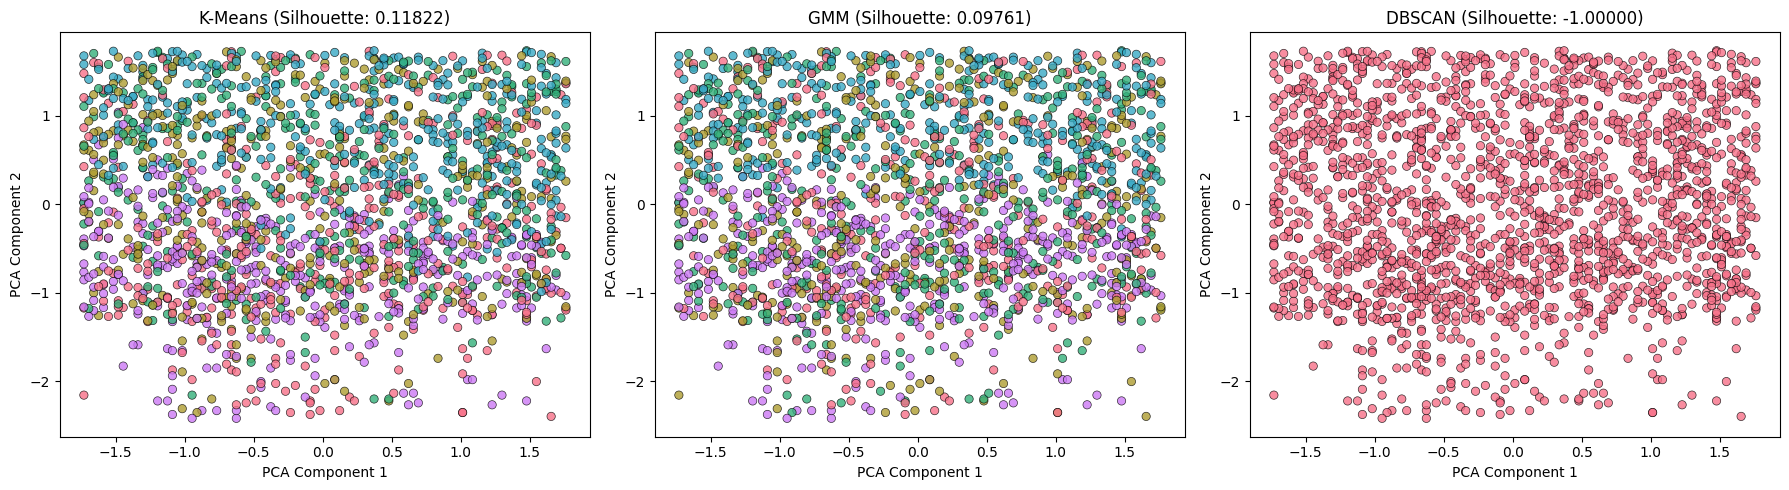

In [ ]:
# Function to plot Clusters with Seaborn
def plot_clusters(X, labels, title, ax):
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)

    palette = sns.color_palette("husl", num_clusters)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=palette, edgecolor='k', ax=ax, alpha=0.8, legend=None)

    ax.set_title(title, fontsize=12)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

# Visualization - Clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_clusters(X_scaled, kmeans_labels, f'K-Means (Silhouette: {silhouette_kmeans:.5f})', axes[0])
plot_clusters(X_scaled, gmm_labels, f'GMM (Silhouette: {silhouette_gmm:.5f})', axes[1])
plot_clusters(X_scaled, dbscan_labels, f'DBSCAN (Silhouette: {silhouette_dbscan:.5f})', axes[2])

plt.tight_layout()
plt.show()

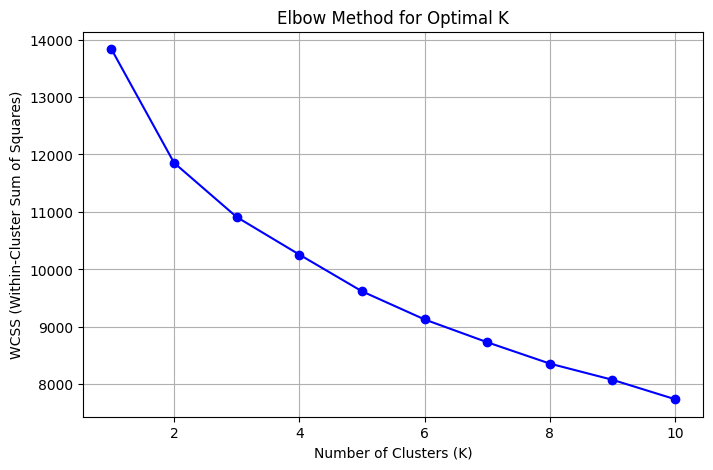

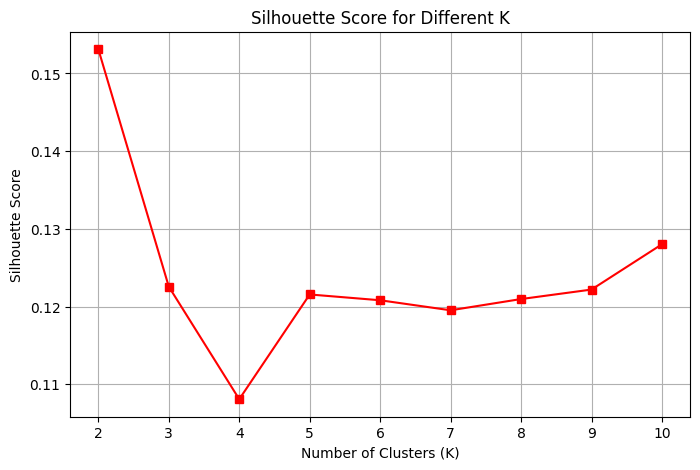

(2, 0.1531201291911825)

In [ ]:
# # Remove invalid data
# df1.fillna({'Profession': 'Unknown'}, inplace=True)
# df1 = df1[df1['Age'] > 0]

# # Convert categorical variables to numerical values
# df1_encoded = df1.copy()
# df1_encoded['Gender'] = df1_encoded['Gender'].astype('category').cat.codes
# df1_encoded['Profession'] = df1_encoded['Profession'].astype('category').cat.codes

# Select numerical variables as features
features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Gender', 'Profession']
X = df_encoded[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the Elbow Method
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Determine the optimal K value
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Compute silhouette scores to further evaluate K value
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot silhouette scores to assess the optimal K value
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.grid(True)
plt.show()

# Select the optimal K value and perform K-means clustering
optimal_k = np.argmax(silhouette_scores) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df1['Cluster'] = kmeans.fit_predict(X_scaled)

# Return the K-means clustering result and the optimal K value
optimal_k, silhouette_scores[optimal_k - 2]

## After PCA

In [ ]:
from sklearn.decomposition import PCA

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

K=2, Unique labels: {0, 1}, Silhouette Score: 0.3217527973570964
K=3, Unique labels: {0, 1, 2}, Silhouette Score: 0.3339726172981053
K=4, Unique labels: {0, 1, 2, 3}, Silhouette Score: 0.32177136662124345
K=5, Unique labels: {0, 1, 2, 3, 4}, Silhouette Score: 0.3216274505081033
K=6, Unique labels: {0, 1, 2, 3, 4, 5}, Silhouette Score: 0.3398340793775675
K=7, Unique labels: {0, 1, 2, 3, 4, 5, 6}, Silhouette Score: 0.3366280639017188
K=8, Unique labels: {0, 1, 2, 3, 4, 5, 6, 7}, Silhouette Score: 0.32490607275968636
K=9, Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8}, Silhouette Score: 0.32996883724637144
Final sil_scores length: 8


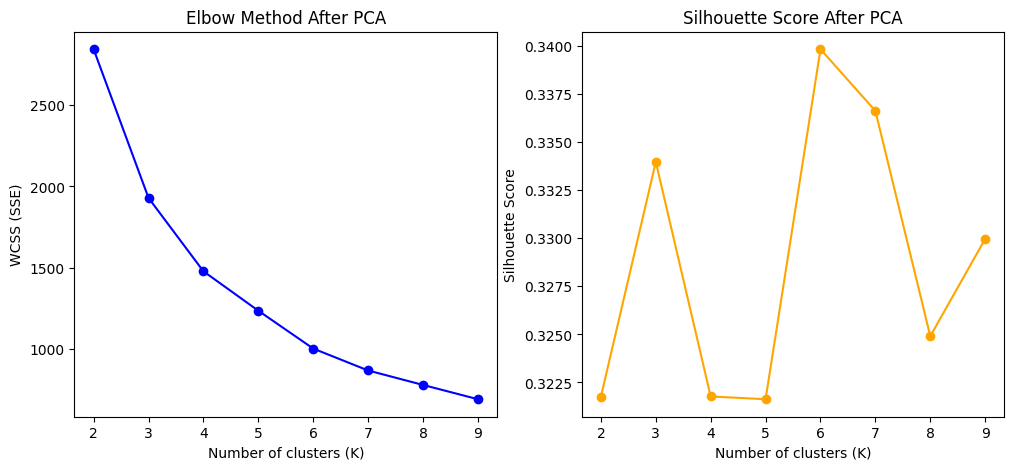

In [ ]:
# WCSS (SSE)
wcss = []
sil_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    labels = kmeans.fit_predict(X_pca)

    wcss.append(kmeans.inertia_)

    if len(set(labels)) > 1:
        score = silhouette_score(X_pca, labels)
        sil_scores.append(score)
    else:
        sil_scores.append(None)
        print(f"K={k}: Only one cluster found, skipping silhouette score.")

    print(f"K={k}, Unique labels: {set(labels)}, Silhouette Score: {sil_scores[-1]}")

print(f"Final sil_scores length: {len(sil_scores)}")


plt.figure(figsize=(12,5))

# WCSS（Elbow Method）
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker="o", color="blue")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (SSE)")
plt.title("Elbow Method After PCA")


# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, marker="o", color="orange")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score After PCA")

plt.show()

In [ ]:
# Clustering After PCA
kmeans_pca = KMeans(n_clusters=6, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

gmm_pca = GaussianMixture(n_components=6, random_state=42)
gmm_pca_labels = gmm_pca.fit_predict(X_pca)

dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_pca_labels = dbscan_pca.fit_predict(X_pca)

# Silhouette Scores (After PCA)
silhouette_kmeans_pca = silhouette_score(X_pca, kmeans_pca_labels)
silhouette_gmm_pca = silhouette_score(X_pca, gmm_pca_labels)
silhouette_dbscan_pca = silhouette_score(X_pca, dbscan_pca_labels) if len(set(dbscan_pca_labels)) > 1 else -1

print(f"Silhouette Score (After PCA):\nK-Means: {silhouette_kmeans_pca:.5f}, GMM: {silhouette_gmm_pca:.5f}, DBSCAN: {silhouette_dbscan_pca:.5f}")

Silhouette Score (After PCA):
K-Means: 0.33877, GMM: 0.33470, DBSCAN: 0.44047


In [ ]:
# Print silhouette scores
print("Silhouette Scores:")
print(f"K-Means: Before PCA = {silhouette_kmeans:.5f}, After PCA = {silhouette_kmeans_pca:.5f}")
print(f"GMM: Before PCA = {silhouette_gmm:.5f}, After PCA = {silhouette_gmm_pca:.5f}")
print(f"DBSCAN: Before PCA = {silhouette_dbscan:.5f}, After PCA = {silhouette_dbscan_pca:.5f}")

Silhouette Scores:
K-Means: Before PCA = 0.11822, After PCA = 0.33877
GMM: Before PCA = 0.09761, After PCA = 0.33470
DBSCAN: Before PCA = -1.00000, After PCA = 0.44047


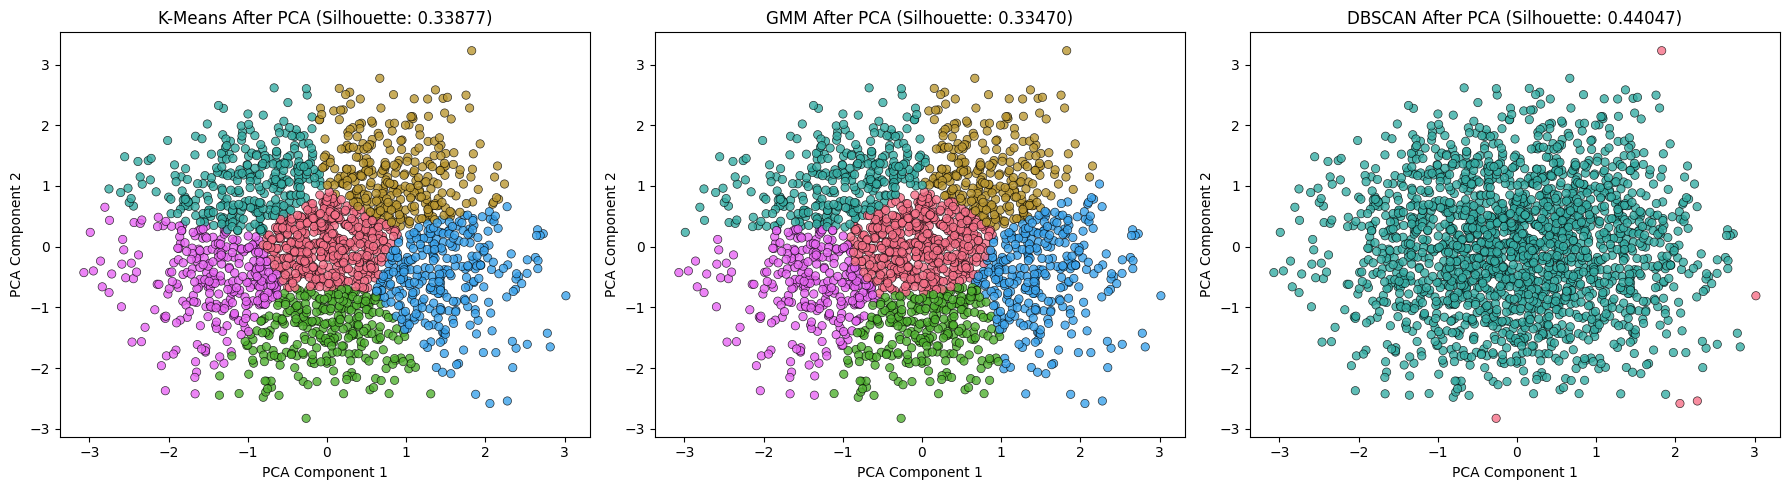

In [ ]:
# Visualization - Clusters After PCA
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_clusters(X_pca, kmeans_pca_labels, f'K-Means After PCA (Silhouette: {silhouette_kmeans_pca:.5f})', axes[0])
plot_clusters(X_pca, gmm_pca_labels, f'GMM After PCA (Silhouette: {silhouette_gmm_pca:.5f})', axes[1])
plot_clusters(X_pca, dbscan_pca_labels, f'DBSCAN After PCA (Silhouette: {silhouette_dbscan_pca:.5f})', axes[2])

plt.tight_layout()
plt.show()

## DBSCAN

DBSCAN with eps=0.3, min_samples=3, silhouette score=0.07584
DBSCAN with eps=0.3, min_samples=5, silhouette score=0.24530
DBSCAN with eps=0.3, min_samples=10, silhouette score=0.36639
DBSCAN with eps=0.5, min_samples=3, silhouette score=0.44210
DBSCAN with eps=0.5, min_samples=5, silhouette score=0.44047
DBSCAN with eps=0.5, min_samples=10, silhouette score=0.44047
DBSCAN with eps=0.7, min_samples=3, silhouette score=0.47657
DBSCAN with eps=0.7, min_samples=5, silhouette score=0.47657
DBSCAN with eps=0.7, min_samples=10, silhouette score=0.47657
DBSCAN with eps=1.0, min_samples=3 resulted in a single cluster.
DBSCAN with eps=1.0, min_samples=5 resulted in a single cluster.
DBSCAN with eps=1.0, min_samples=10 resulted in a single cluster.


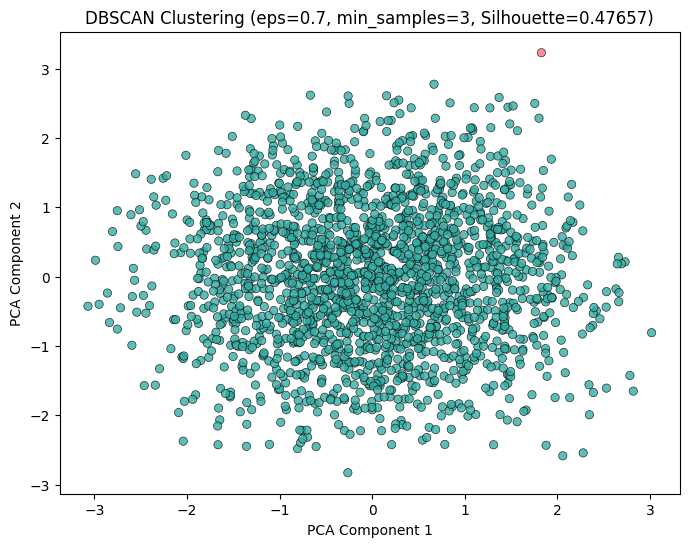

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Try different DBSCAN parameters
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

best_eps, best_min_samples, best_silhouette = None, None, -1
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)

        # Calculate silhouette score only if there are multiple clusters
        if len(set(labels)) > 1:
            score = silhouette_score(X_pca, labels)
            print(f"DBSCAN with eps={eps}, min_samples={min_samples}, silhouette score={score:.5f}")

            if score > best_silhouette:
                best_eps, best_min_samples, best_silhouette = eps, min_samples, score
                best_labels = labels
        else:
            print(f"DBSCAN with eps={eps}, min_samples={min_samples} resulted in a single cluster.")

# Run DBSCAN with the best parameters
dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels_final = dbscan_final.fit_predict(X_pca)

# Plot DBSCAN clustering results
fig, ax = plt.subplots(figsize=(8, 6))

plot_clusters(X_pca, dbscan_labels_final,
              f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples}, Silhouette={best_silhouette:.5f})', ax)

plt.show()

In [ ]:
import pandas as pd

df1_clean['DBSCAN_Cluster'] = dbscan_labels_final

numeric_cols = ["Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]
cluster_means = df1_clean.groupby("DBSCAN_Cluster")[numeric_cols].mean()

gender_dist = df1_clean.groupby("DBSCAN_Cluster")["Gender"].value_counts(normalize=True).unstack()
profession_dist = df1_clean.groupby("DBSCAN_Cluster")["Profession"].value_counts(normalize=True).unstack()

print("Gender Distribution:\n", gender_dist)
print("\nProfession Distribution:\n", profession_dist)

print(cluster_means)

## Use GMM

In [ ]:
# Range of K values to test
K_range = range(2, 10)
silhouette_scores = []

# Compute silhouette scores for different K values
for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    clusters = gmm.fit_predict(X_pca)  # Fit & predict labels
    silhouette = silhouette_score(X_pca, clusters)
    silhouette_scores.append(silhouette)
    print(f"GMM K={k}, Silhouette Score={silhouette:.6f}")

# Find the optimal K (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal K for GMM: {optimal_k}")

# Visualization - Silhouette Scores for Different K
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='royalblue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different K (GMM)")
plt.xticks(K_range)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Apply GMM with the optimal K
gmm_optimal = GaussianMixture(n_components=optimal_k, random_state=42)
df1['GMM_Cluster'] = gmm_optimal.fit_predict(X_pca)

# Visualization - GMM Clustering with Optimal K
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df1['GMM_Cluster'], cmap='rainbow', alpha=0.6)
plt.title(f"GMM Clustering with K={optimal_k} After PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
print(f"Original df1 shape: {df1.shape}")
print(f"Original X_pca shape: {X_pca.shape}")

df1_clean = df1.dropna()

print(f"After dropna df1 shape: {df1_clean.shape}")
print(f"X_pca shape should match: {X_pca[:df1_clean.shape[0]].shape}")

df1_clean = df1.iloc[:1976].copy()  # 关键：加 `.copy()`
X_pca_clean = X_pca  # X_pca 也是 1976 行

# 重新聚类
df1_clean["GMM_Cluster"] = gmm_optimal.fit_predict(X_pca_clean)

In [ ]:
import pandas as pd

numeric_cols = ["Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]
cluster_means = df1_clean.groupby("GMM_Cluster")[numeric_cols].mean()

gender_dist = df1_clean.groupby("GMM_Cluster")["Gender"].value_counts(normalize=True).unstack()
profession_dist = df1_clean.groupby("GMM_Cluster")["Profession"].value_counts(normalize=True).unstack()

print("Gender Distribution:\n", gender_dist)
print("\nProfession Distribution:\n", profession_dist)

print(cluster_means)

# K-means

K-Means K=2, Silhouette Score=0.321753
K-Means K=3, Silhouette Score=0.333973
K-Means K=4, Silhouette Score=0.321771
K-Means K=5, Silhouette Score=0.321627
K-Means K=6, Silhouette Score=0.339834
K-Means K=7, Silhouette Score=0.336628
K-Means K=8, Silhouette Score=0.324906
K-Means K=9, Silhouette Score=0.329969

Optimal K for K-Means: 6


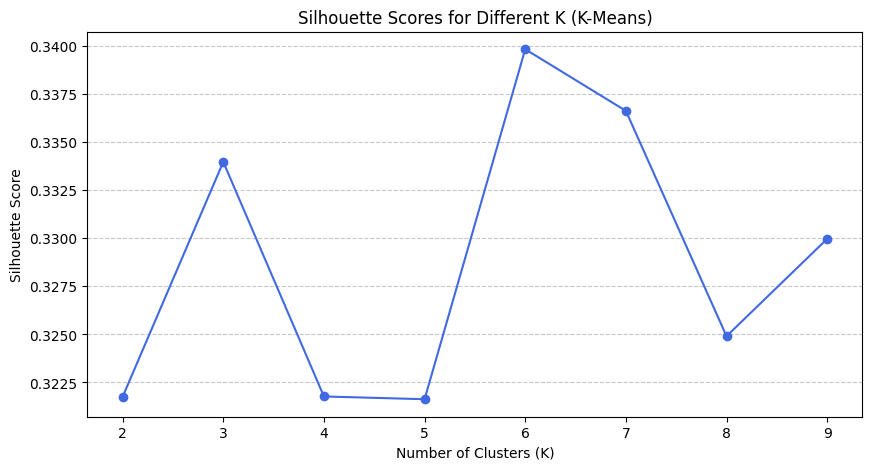

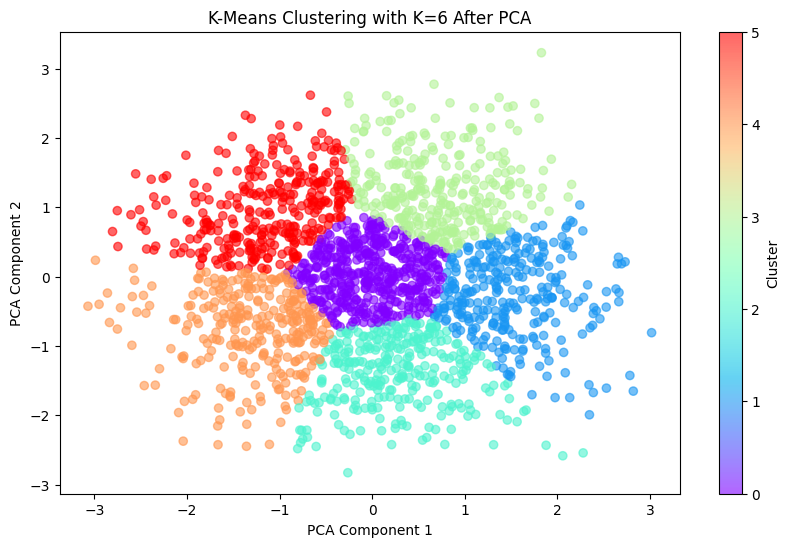

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Range of K values to test
K_range = range(2, 10)
silhouette_scores = []

# Compute silhouette scores for different K values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_pca)  # Fit & predict labels
    silhouette = silhouette_score(X_pca, clusters)
    silhouette_scores.append(silhouette)
    print(f"K-Means K={k}, Silhouette Score={silhouette:.6f}")

# Find the optimal K (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal K for K-Means: {optimal_k}")

# Visualization - Silhouette Scores for Different K
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='royalblue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different K (K-Means)")
plt.xticks(K_range)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Apply K-Means with the optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df1['KMeans_Cluster'] = kmeans_optimal.fit_predict(X_pca)

# Visualization - K-Means Clustering with Optimal K
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df1['KMeans_Cluster'], cmap='rainbow', alpha=0.6)
plt.title(f"K-Means Clustering with K={optimal_k} After PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
import pandas as pd

numeric_cols = ["Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]
cluster_means = df1.groupby("KMeans_Cluster")[numeric_cols].mean()

gender_dist = df1.groupby("KMeans_Cluster")["Gender"].value_counts(normalize=True).unstack()
profession_dist = df1.groupby("KMeans_Cluster")["Profession"].value_counts(normalize=True).unstack()

print("Gender Distribution:\n", gender_dist)
print("\nProfession Distribution:\n", profession_dist)

print(cluster_means)

Gender Distribution:
 Gender                 0         1
KMeans_Cluster                    
0               0.609170  0.390830
1               0.503378  0.496622
2               0.442568  0.557432
3               0.667742  0.332258
4               0.641892  0.358108
5               0.668750  0.331250

Profession Distribution:
 Profession             0         1         2         3         4         5  \
KMeans_Cluster                                                               
0               0.283843  0.074236  0.115721  0.163755  0.074236  0.176856   
1               0.135135  0.054054  0.084459  0.087838  0.101351  0.243243   
2               0.074324  0.040541  0.064189  0.091216  0.097973  0.253378   
3               0.441935  0.106452  0.077419  0.116129  0.070968  0.129032   
4               0.327703  0.084459  0.091216  0.138514  0.060811  0.168919   
5               0.565625  0.115625  0.090625  0.081250  0.059375  0.062500   

Profession             6         7         8  

# Evaluation Clustering Performance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import davies_bouldin_score

X_scaled = X_pca

# K-Means Evaluation
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
ch_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
db_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

# GMM Evaluation
gmm = GaussianMixture(n_components=6, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
ch_gmm = calinski_harabasz_score(X_scaled, gmm_labels)
db_gmm = davies_bouldin_score(X_scaled, gmm_labels)

# Print Results
print("\n--- Clustering Performance Evaluation ---")
print(f"Silhouette Score:\nK-Means: {silhouette_kmeans:.5f}, GMM: {silhouette_gmm:.5f}")
print(f"Calinski-Harabasz Index:\nK-Means: {ch_kmeans:.5f}, GMM: {ch_gmm:.5f}")
print(f"Davies-Bouldin Index:\nK-Means: {db_kmeans:.5f}, GMM: {db_gmm:.5f}")  # Printing DBI results



--- Clustering Performance Evaluation ---
Silhouette Score:
K-Means: 0.33983, GMM: 0.33470
Calinski-Harabasz Index:
K-Means: 1319.27613, GMM: 1273.72068
Davies-Bouldin Index:
K-Means: 0.81429, GMM: 0.82364


# Cluster Testing


In [ ]:
from sklearn.utils import resample
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Function to test cluster stability using bootstrapping
def test_bootstrapping(model, X, original_labels):
    for i in range(5):  # Run 5 times
        X_sample = resample(X, n_samples=int(0.8 * len(X)), random_state=i)
        cluster_labels_sample = model.fit_predict(X_sample)
        ari_score = adjusted_rand_score(original_labels[:len(X_sample)], cluster_labels_sample)
        print(f"Iteration {i+1}, ARI Score: {ari_score:.5f}")

# Function to test stability after adding noise
def test_noise_perturbation(model, X, original_labels):
    X_noisy = X + np.random.normal(0, 0.01, X.shape)  # Add small noise
    noisy_labels = model.fit_predict(X_noisy)
    ari_score = adjusted_rand_score(original_labels, noisy_labels)
    print(f"ARI Score after adding noise: {ari_score:.5f}")

# Test different distance metrics (for K-Means)
def test_distance_metrics(X):
    dist_metrics = ["euclidean", "manhattan", "cosine"]
    for metric in dist_metrics:
        dist_matrix = pairwise_distances(X, metric=metric)
        print(f"Distance metric: {metric}, mean distance: {np.mean(dist_matrix):.5f}")

# Test stability for K-Means
print("\n--- Cluster Stability Testing: K-Means ---")
test_bootstrapping(kmeans, X_scaled, kmeans_labels)
test_noise_perturbation(kmeans, X_scaled, kmeans_labels)
test_distance_metrics(X_scaled)

# Test stability for GMM
print("\n--- Cluster Stability Testing: GMM ---")
test_bootstrapping(gmm, X_scaled, gmm_labels)
test_noise_perturbation(gmm, X_scaled, gmm_labels)


--- Cluster Stability Testing: K-Means ---
Iteration 1, ARI Score: -0.00127
Iteration 2, ARI Score: 0.00034
Iteration 3, ARI Score: -0.00053
Iteration 4, ARI Score: -0.00011
Iteration 5, ARI Score: 0.00127
ARI Score after adding noise: 0.94643
Distance metric: euclidean, mean distance: 1.87455
Distance metric: manhattan, mean distance: 2.38835
Distance metric: cosine, mean distance: 1.00000

--- Cluster Stability Testing: GMM ---
Iteration 1, ARI Score: -0.00190
Iteration 2, ARI Score: 0.00153
Iteration 3, ARI Score: -0.00057
Iteration 4, ARI Score: -0.00144
Iteration 5, ARI Score: 0.00211
ARI Score after adding noise: 0.74349


# Cluster Analysis

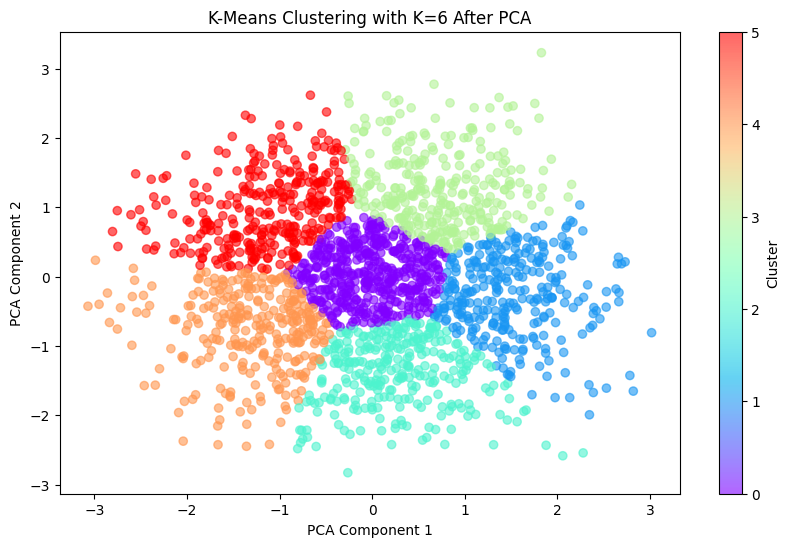


Cluster Counts:
 KMeans_Cluster
0    458
5    320
3    310
4    296
2    296
1    296
Name: count, dtype: int64
Gender Distribution:
 Gender                 0         1
KMeans_Cluster                    
0               0.609170  0.390830
1               0.503378  0.496622
2               0.442568  0.557432
3               0.667742  0.332258
4               0.641892  0.358108
5               0.668750  0.331250

Profession Distribution:
 Profession             0         1         2         3         4         5  \
KMeans_Cluster                                                               
0               0.283843  0.074236  0.115721  0.163755  0.074236  0.176856   
1               0.135135  0.054054  0.084459  0.087838  0.101351  0.243243   
2               0.074324  0.040541  0.064189  0.091216  0.097973  0.253378   
3               0.441935  0.106452  0.077419  0.116129  0.070968  0.129032   
4               0.327703  0.084459  0.091216  0.138514  0.060811  0.168919   
5           

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization - K-Means Clustering with Optimal K
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df1['KMeans_Cluster'], cmap='rainbow', alpha=0.6)
plt.title(f"K-Means Clustering with K={optimal_k} After PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Count of instances per cluster
cluster_counts = df1['KMeans_Cluster'].value_counts()
print("\nCluster Counts:\n", cluster_counts)

numeric_cols = ["Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]
cluster_means = df1.groupby("KMeans_Cluster")[numeric_cols].mean()

gender_dist = df1.groupby("KMeans_Cluster")["Gender"].value_counts(normalize=True).unstack()
profession_dist = df1.groupby("KMeans_Cluster")["Profession"].value_counts(normalize=True).unstack()

print("Gender Distribution:\n", gender_dist)
print("\nProfession Distribution:\n", profession_dist)

print(cluster_means)

<Figure size 1200x600 with 0 Axes>

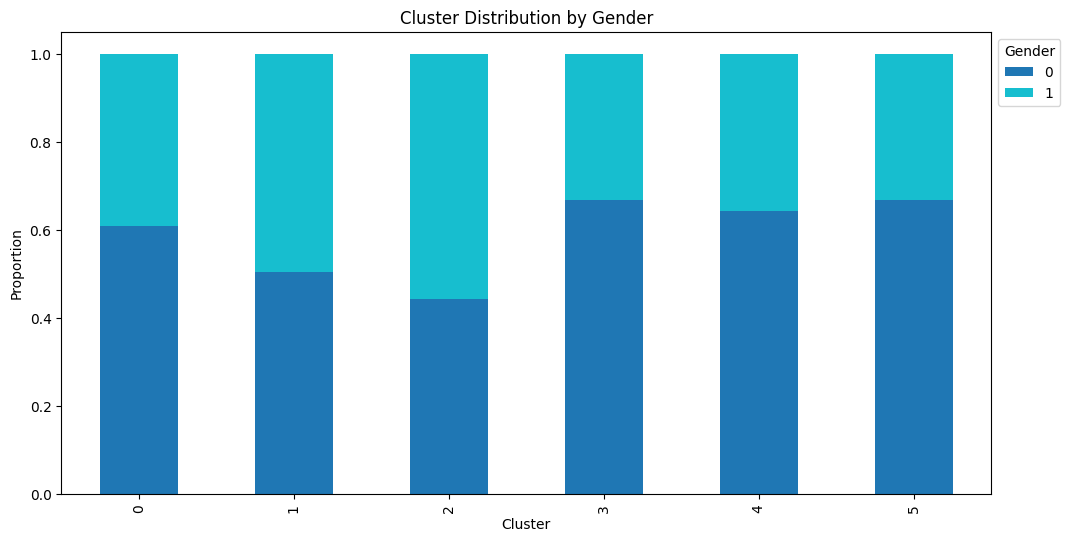

<Figure size 1200x600 with 0 Axes>

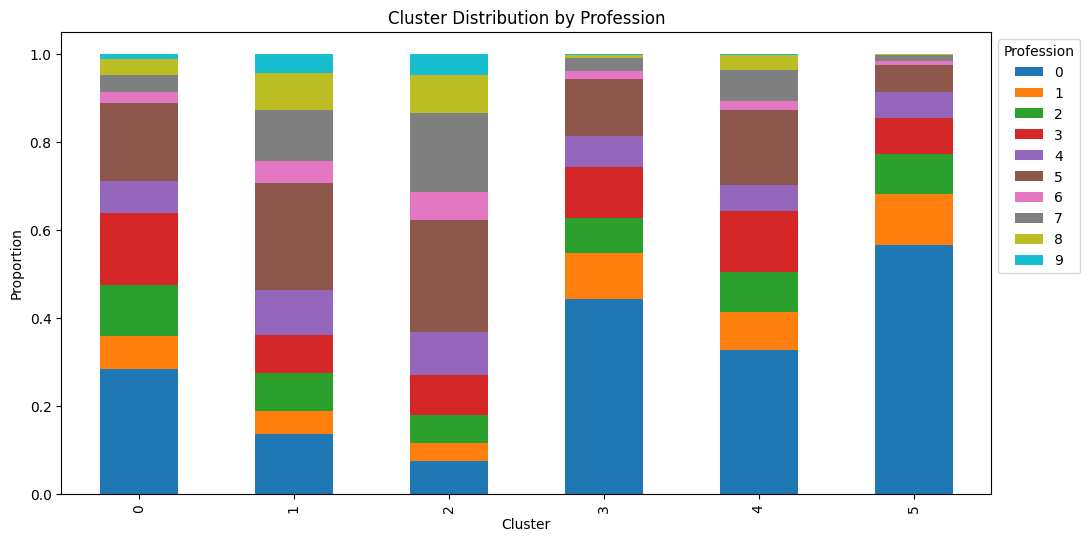

<Figure size 1200x600 with 0 Axes>

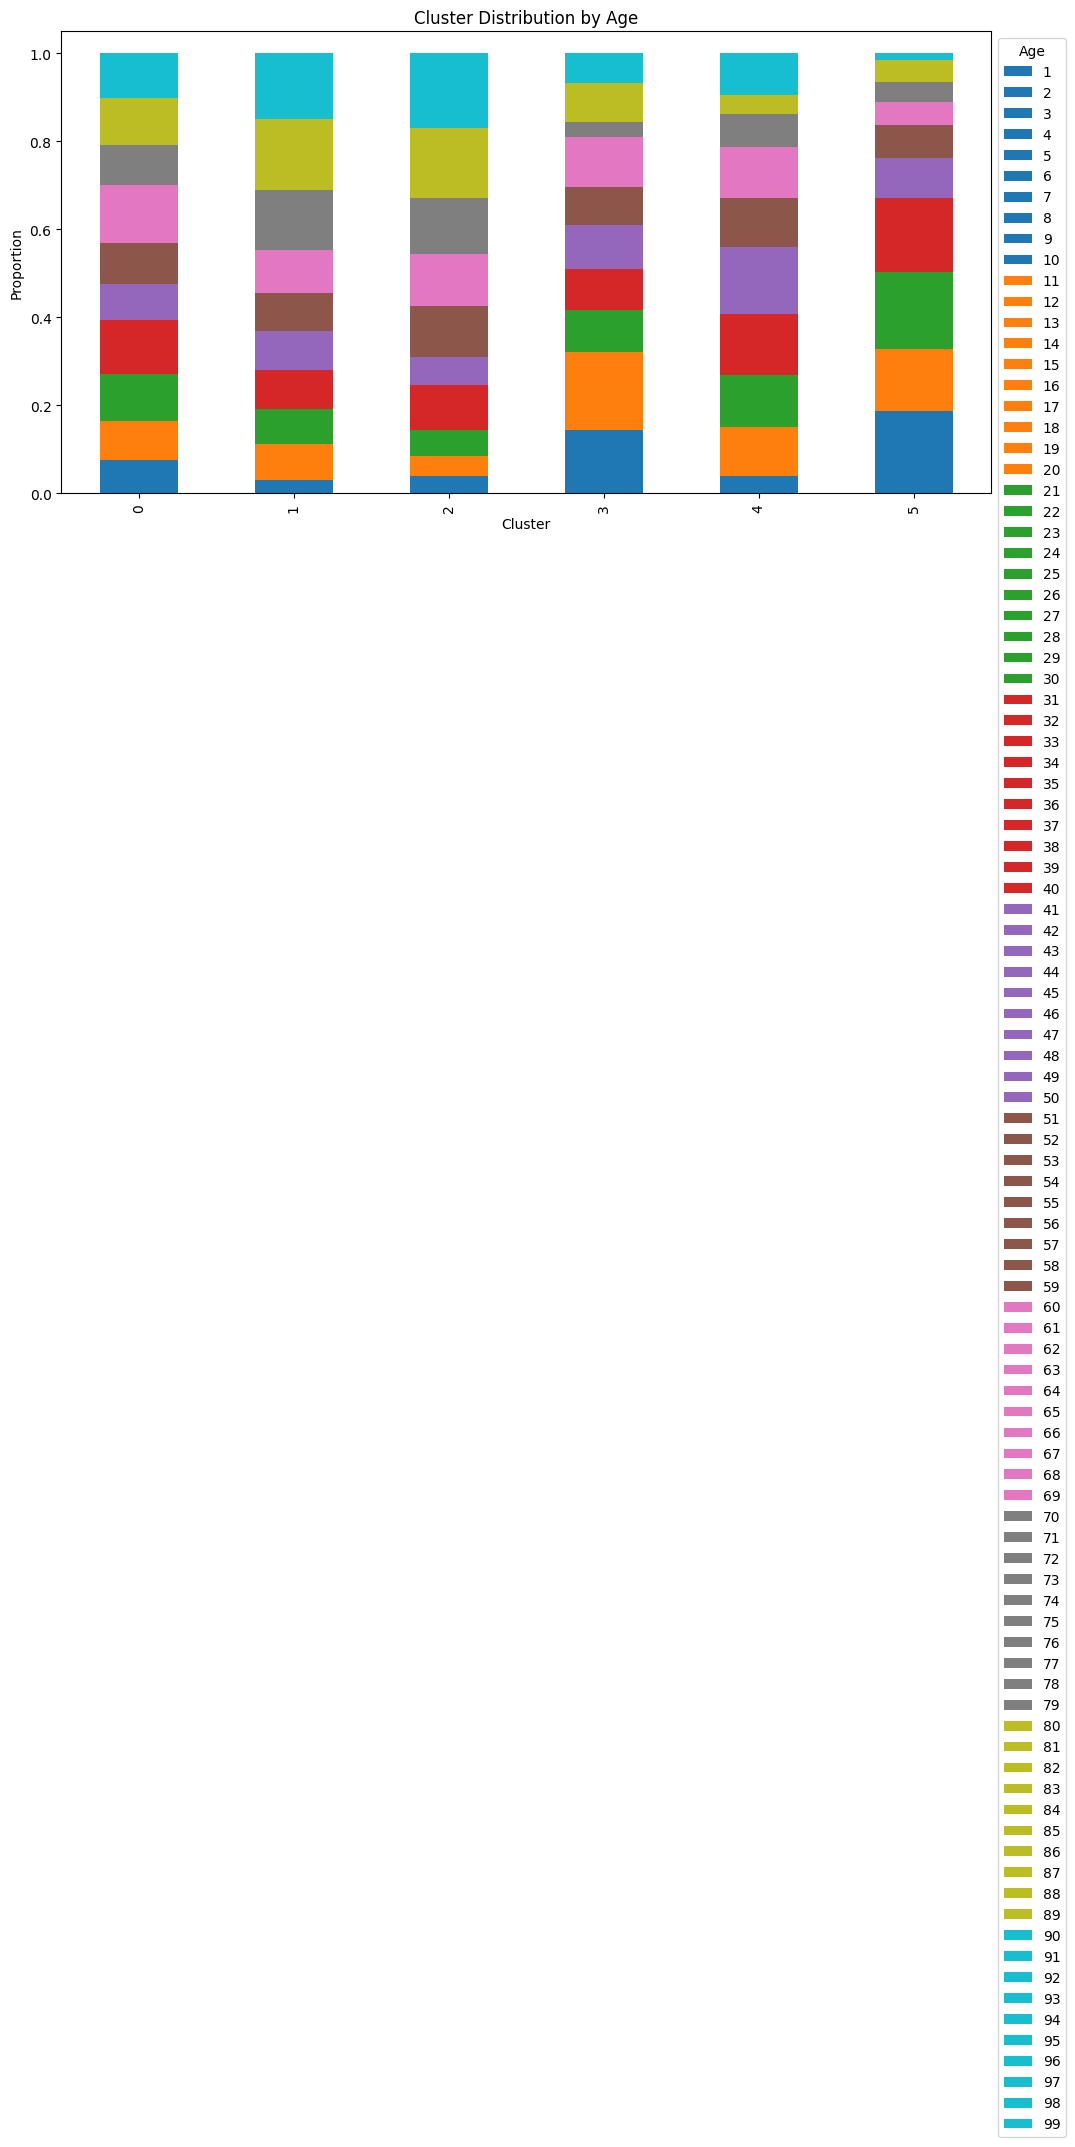

<Figure size 1200x600 with 0 Axes>

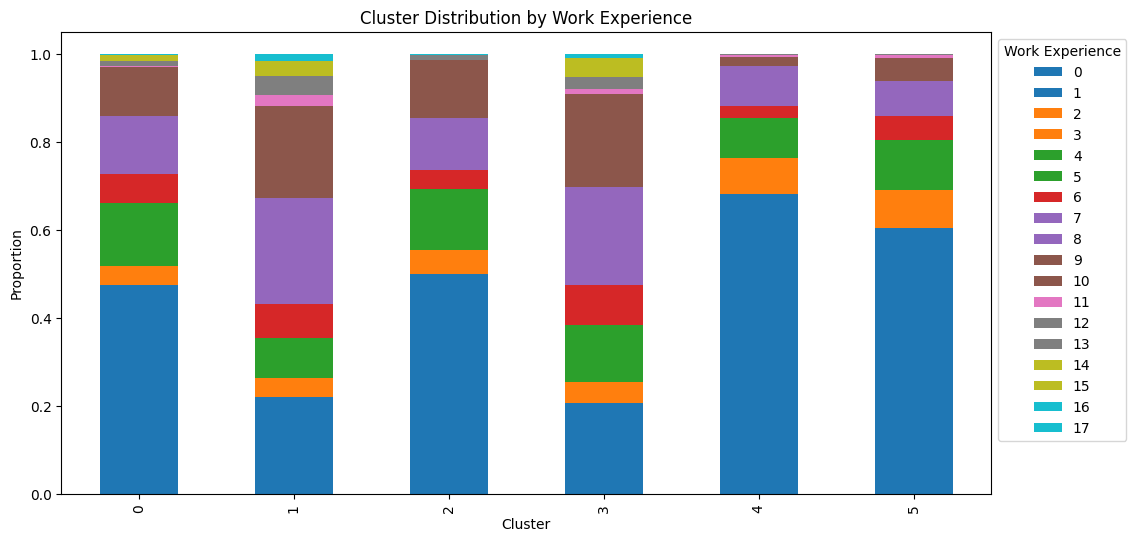

<Figure size 1200x600 with 0 Axes>

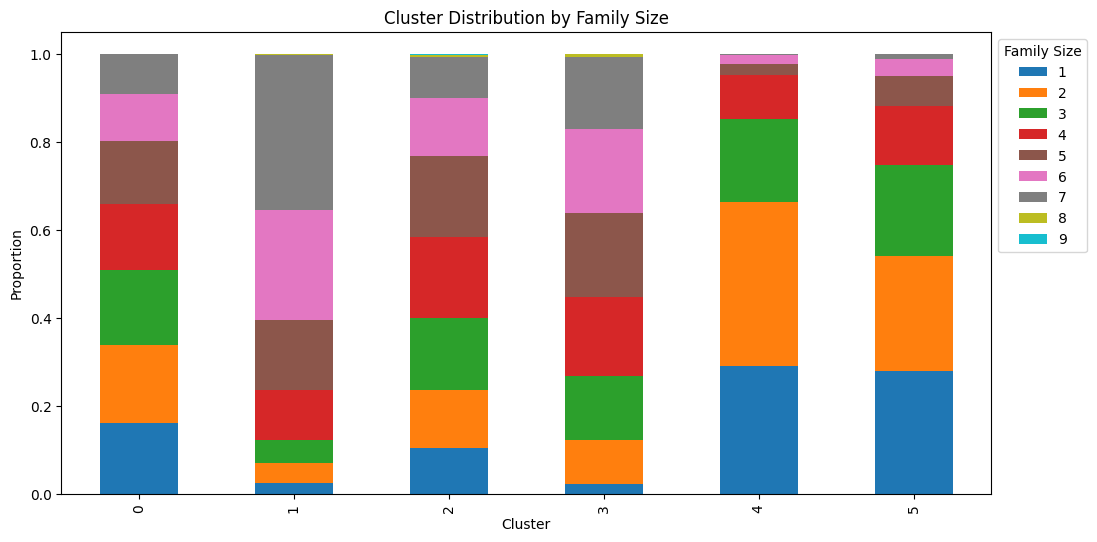

In [ ]:
# Visualizing cluster distributions for categorical columns
categorical_cols = ["Gender", "Profession","Age", "Work Experience", "Family Size"]
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    cluster_crosstab = pd.crosstab(df1['KMeans_Cluster'], df1[col], normalize='index')
    cluster_crosstab.plot(kind='bar', stacked=True, colormap='tab10', figsize=(12, 6))
    plt.xlabel('Cluster')
    plt.ylabel('Proportion')
    plt.title(f'Cluster Distribution by {col}')
    plt.legend(title=col, bbox_to_anchor=(1, 1))
    plt.show()

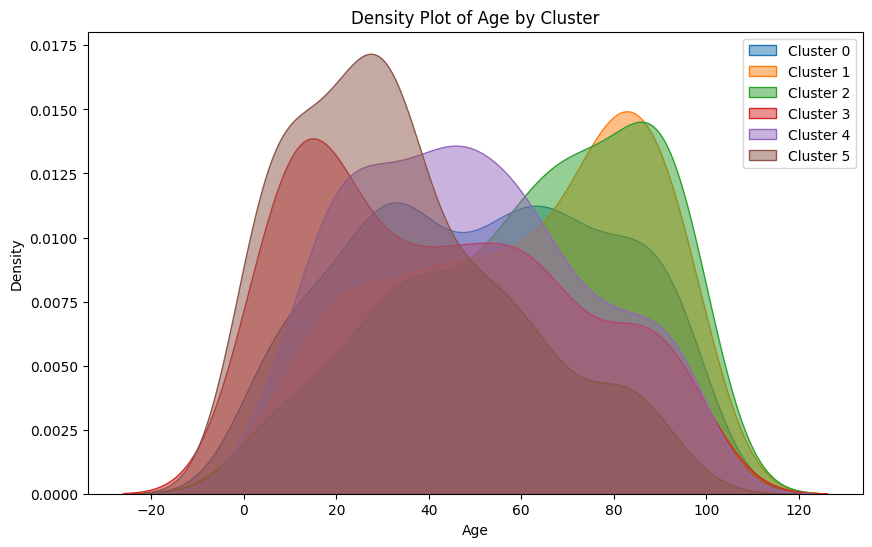

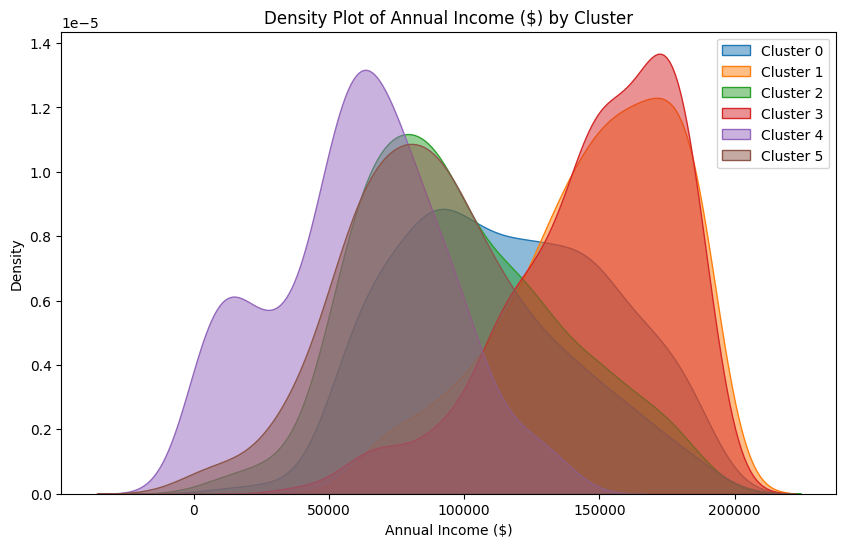

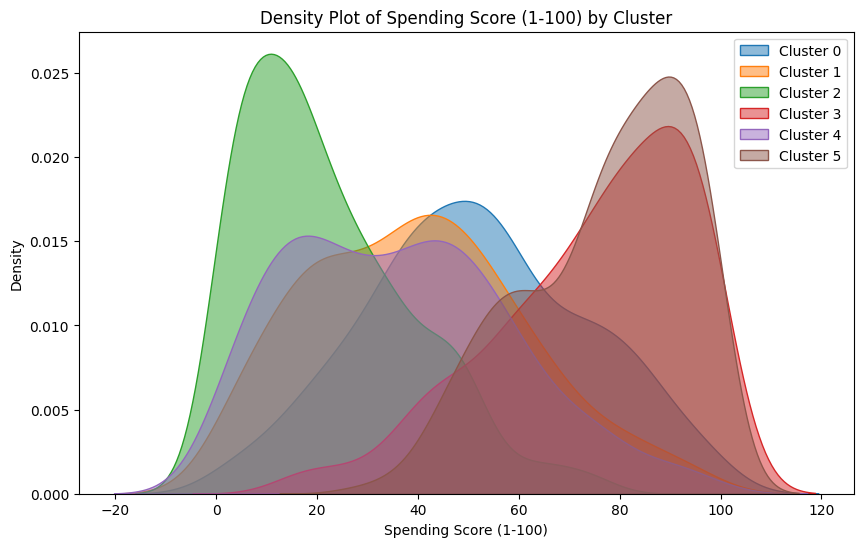

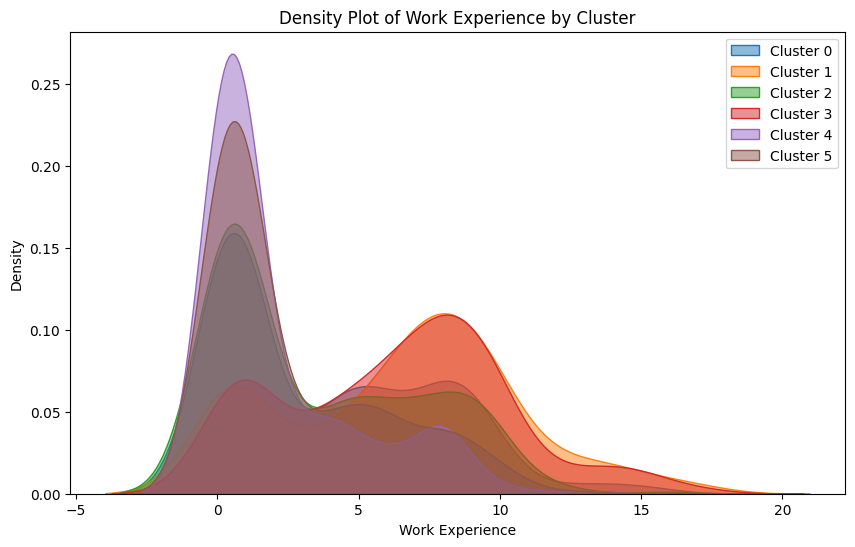

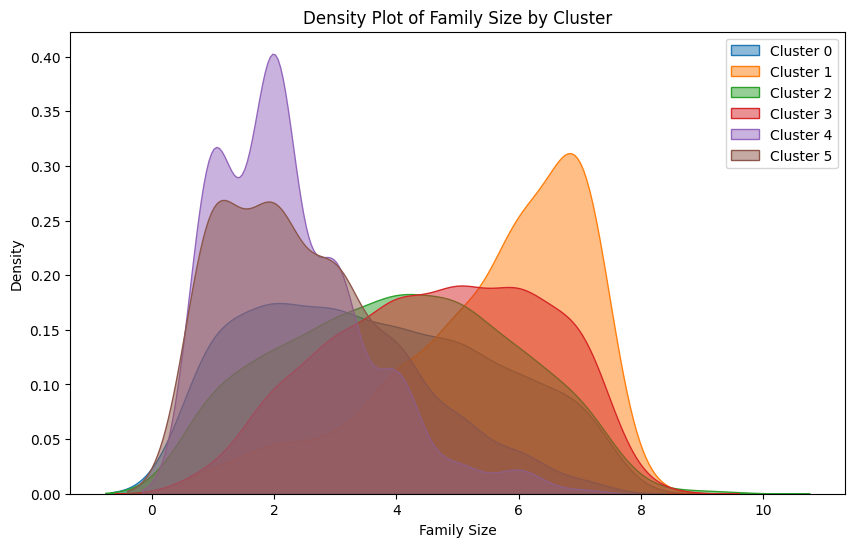

In [ ]:
# Visualizing density plots for each cluster
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    for cluster in sorted(df1['KMeans_Cluster'].unique()):
        sns.kdeplot(df1[df1['KMeans_Cluster'] == cluster][col], label=f'Cluster {cluster}', fill=True, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Density Plot of {col} by Cluster')
    plt.legend()
    plt.show()

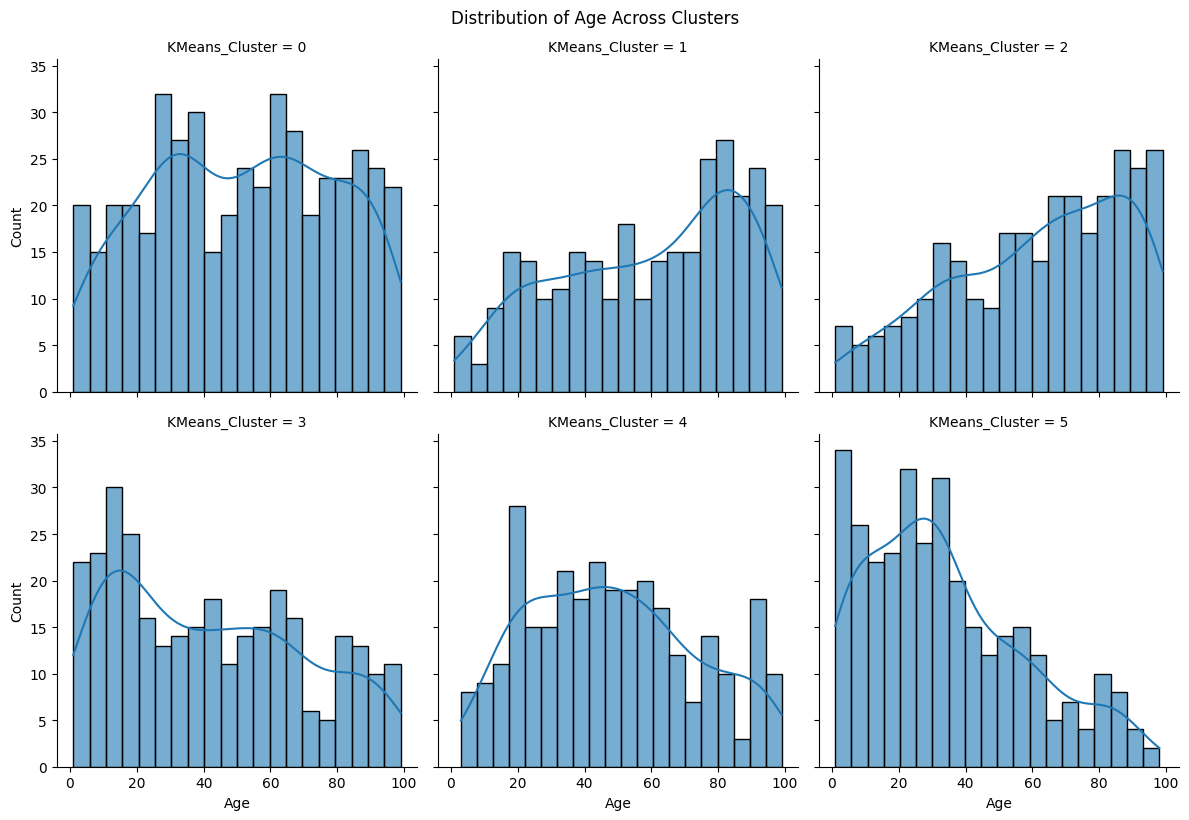

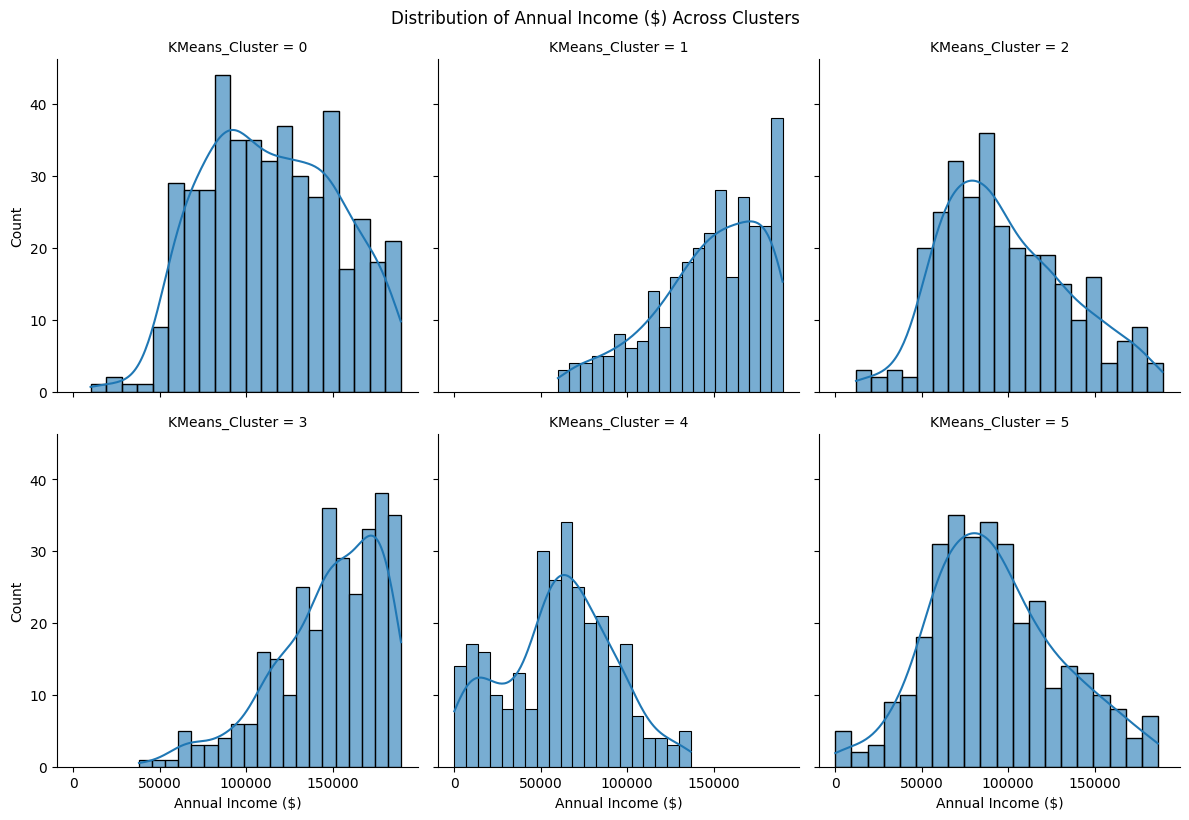

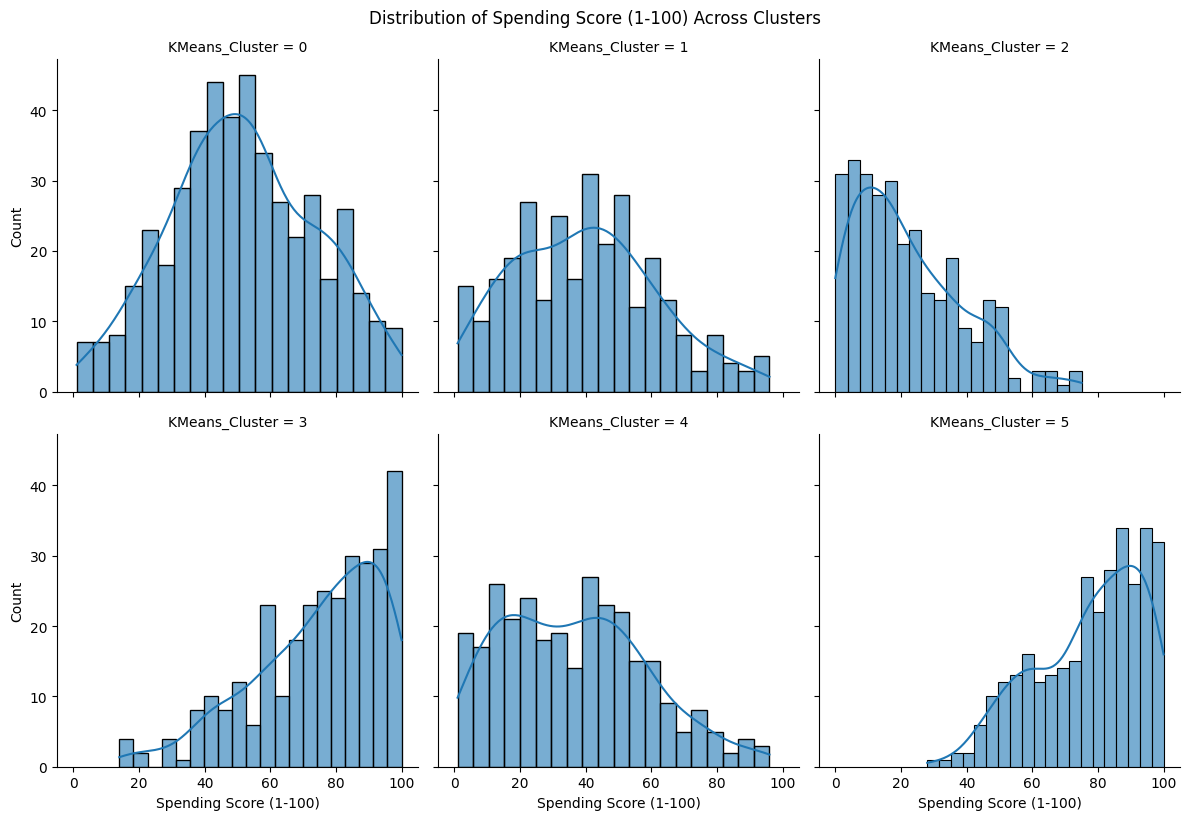

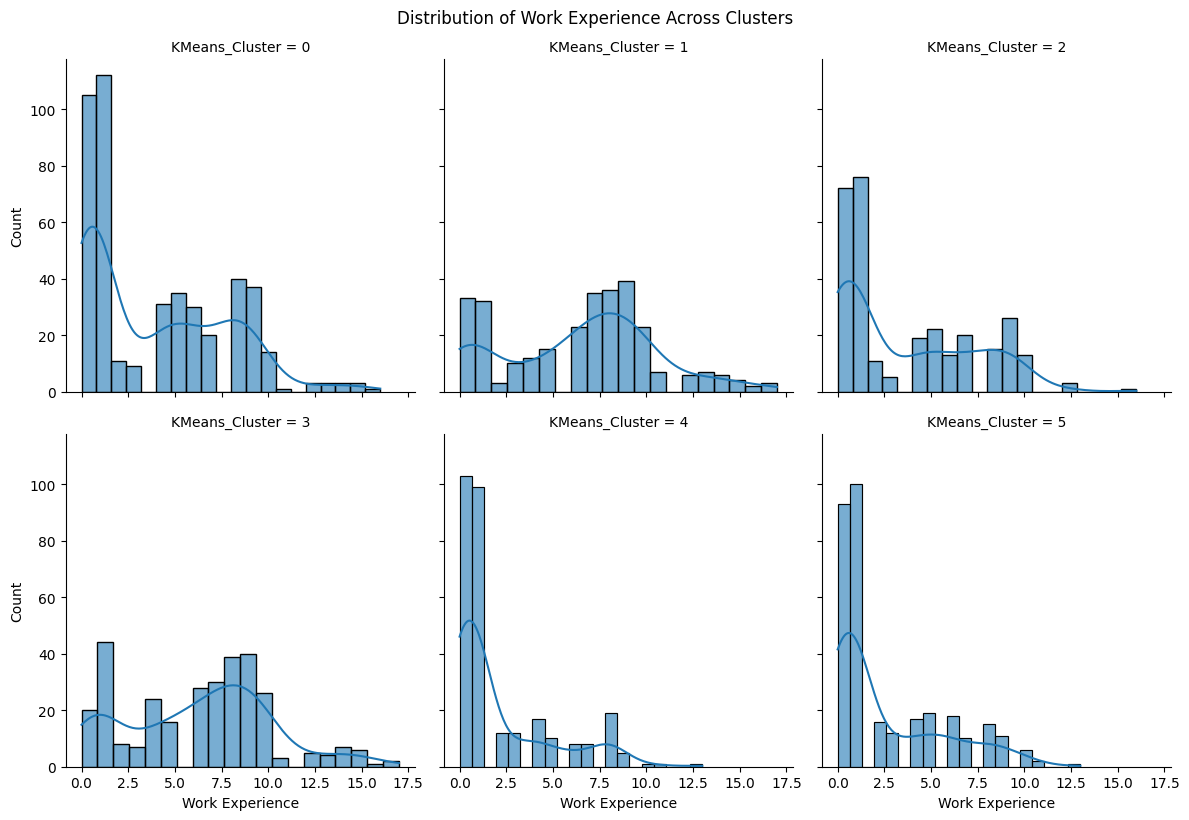

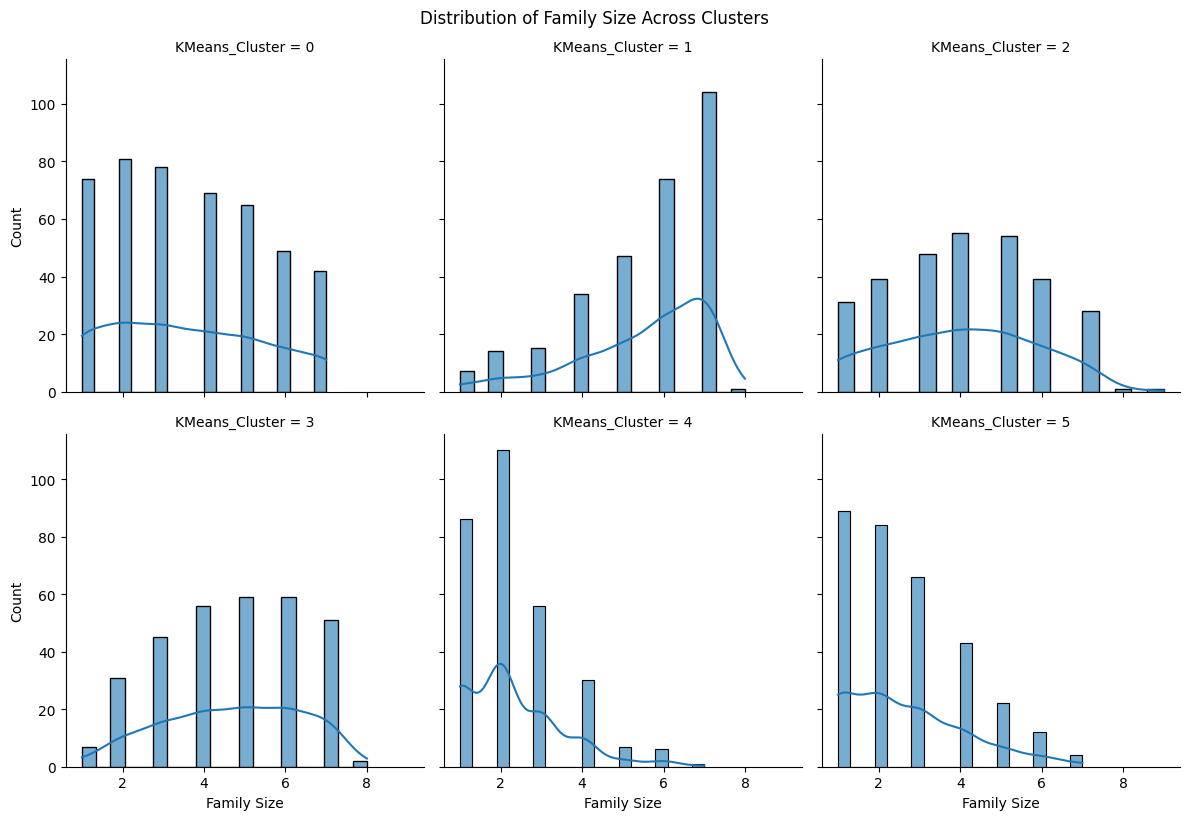

In [ ]:
# Creating FacetGrid for each numerical column to show distribution by cluster
for col in numeric_cols:
    g = sns.FacetGrid(df1, col='KMeans_Cluster', col_wrap=3, height=4, sharex=True, sharey=True)
    g.map(sns.histplot, col, kde=True, bins=20, alpha=0.6)
    g.fig.suptitle(f'Distribution of {col} Across Clusters', y=1.02)
    plt.show()